"Linear Regression is a supervised learning algorithm. The data is labeled and the algorithm tries to find a linear model that fits the data. The model is then used to predict the label of new data points."

Steps to solve the problem:

1. get the data
2. perform exploratory data analysis
3. clean the data
4. review the model form
5. train and test groups
6. linear regression model

1 - GET THE DATA

In [1]:
df <- read.csv("../../data/student-mat.csv", sep = ";")

In [2]:
print(head(df))

  school sex age address famsize Pstatus Medu Fedu     Mjob     Fjob     reason
1     GP   F  18       U     GT3       A    4    4  at_home  teacher     course
2     GP   F  17       U     GT3       T    1    1  at_home    other     course
3     GP   F  15       U     LE3       T    1    1  at_home    other      other
4     GP   F  15       U     GT3       T    4    2   health services       home
5     GP   F  16       U     GT3       T    3    3    other    other       home
6     GP   M  16       U     LE3       T    4    3 services    other reputation
  guardian traveltime studytime failures schoolsup famsup paid activities
1   mother          2         2        0       yes     no   no         no
2   father          1         2        0        no    yes   no         no
3   mother          1         2        3       yes     no  yes         no
4   mother          1         3        0        no    yes  yes        yes
5   father          1         2        0        no    yes  yes        

In [3]:
print(summary(df))

    school              sex                 age         address         
 Length:395         Length:395         Min.   :15.0   Length:395        
 Class :character   Class :character   1st Qu.:16.0   Class :character  
 Mode  :character   Mode  :character   Median :17.0   Mode  :character  
                                       Mean   :16.7                     
                                       3rd Qu.:18.0                     
                                       Max.   :22.0                     
   famsize            Pstatus               Medu            Fedu      
 Length:395         Length:395         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.749   Mean   :2.522  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   Max.   :

In [4]:
# check for missing values
print(any(is.na(df)))

[1] FALSE


In [5]:
print(str(df))

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

2 - EXPLORATORY DATA ANALYSIS

In [6]:
library(ggplot2)
library(ggthemes)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# grab only the numeric columns
numeric.cols <- sapply(df, is.numeric)
# filter out the non-numeric columns
corr.data <- cor(df[, numeric.cols])
print(corr.data)



                    age         Medu         Fedu   traveltime    studytime
age         1.000000000 -0.163658419 -0.163438069  0.070640721 -0.004140037
Medu       -0.163658419  1.000000000  0.623455112 -0.171639305  0.064944137
Fedu       -0.163438069  0.623455112  1.000000000 -0.158194054 -0.009174639
traveltime  0.070640721 -0.171639305 -0.158194054  1.000000000 -0.100909119
studytime  -0.004140037  0.064944137 -0.009174639 -0.100909119  1.000000000
failures    0.243665377 -0.236679963 -0.250408444  0.092238746 -0.173563031
famrel      0.053940096 -0.003914458 -0.001369727 -0.016807986  0.039730704
freetime    0.016434389  0.030890867 -0.012845528 -0.017024944 -0.143198407
goout       0.126963880  0.064094438  0.043104668  0.028539674 -0.063903675
Dalc        0.131124605  0.019834099  0.002386429  0.138325309 -0.196019263
Walc        0.117276052 -0.047123460 -0.012631018  0.134115752 -0.253784731
health     -0.062187369 -0.046877829  0.014741537  0.007500606 -0.075615863
absences    

In [8]:
install.packages("corrgram", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")

Installing package into ‘/Users/robsontrajano/Library/R/x86_64/4.1/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T//RtmpfMCoSZ/downloaded_packages


Installing package into ‘/Users/robsontrajano/Library/R/x86_64/4.1/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T//RtmpfMCoSZ/downloaded_packages


In [9]:
help(corrplot)

No documentation for ‘corrplot’ in specified packages and libraries:
you could try ‘??corrplot’

In [10]:
print(??corrplot)

R Information

Vignettes with name or keyword or title matching ‘corrplot’ using fuzzy
matching:


corrplot::corrplot-intro
                        An Introduction to corrplot Package


Type 'vignette("FOO", package="PKG")' to inspect entries 'PKG::FOO'.



Help files with alias or concept or title matching ‘corrplot’ using
fuzzy matching:


corrplot::corrplot      A visualization of a correlation matrix.
  Aliases: corrplot
corrplot::corrplot-package
                        Visualization of a correlation matrix
  Aliases: corrplot-package
corrplot::corrplot.mixed
                        Using mixed methods to visualize a correlation
                        matrix.
  Aliases: corrplot.mixed
grDevices::replayPlot   Record and Replay Plots
  Aliases: recordPlot


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




In [12]:
library(corrgram)
library(corrplot)

corrplot 0.92 loaded



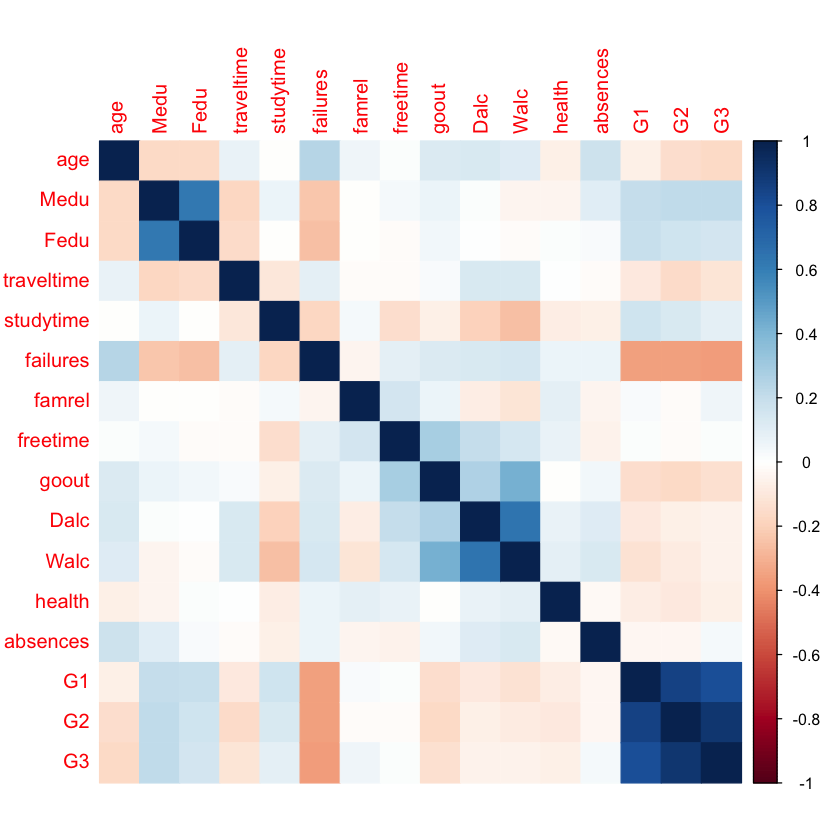

In [15]:
corrplot(corr.data, method = "color")